Repeat each of the analyses performed on using the Commute Distance feature instead of Education. In particular:

- Duplicate the data preparation steps from the beginning of the chapter (if not already stored in memory)

- Generate a barplot with a color palette that you find in the Seaborn documentation or elsewhere; use anything but the blue used in the chapter

- Sort the bars by the length of the commute distance (i.e., not alphabetically)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/bikebuyers.csv',
                usecols = ['Education', 'Commute Distance', 'Purchased Bike', 'Age', 'Home Owner'])

In [2]:
# Create a new column that is a copy of Education
df['Education_rank'] = df['Education']

# Replace the values in the new column with the rank-ordered versions
df.Education_rank.replace(['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree'], 
                    [1, 2, 3, 4, 5], inplace=True)

# Let Pandas know that your new feature is a number now rather than an object
df.astype({'Education_rank':'int64'})
df.head()

,Age,Education,Home Owner,Commute Distance,Purchased Bike,Education_rank
0,40,Bachelors,Yes,1-2 Miles,Yes,4
1,56,High School,No,1-2 Miles,Yes,2
2,52,Partial College,Yes,5-10 Miles,Yes,3
3,48,Partial College,Yes,2-5 Miles,Yes,3
4,43,Partial College,Yes,5-10 Miles,No,3


In [3]:
df['Commute_rank'] = df['Commute Distance']
df.Commute_rank.replace(['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles'], 
                    [0, 1, 2, 5, 10], inplace=True)
df.astype({'Commute_rank':'int64'})
df.head()

,Age,Education,Home Owner,Commute Distance,Purchased Bike,Education_rank,Commute_rank
0,40,Bachelors,Yes,1-2 Miles,Yes,4,1
1,56,High School,No,1-2 Miles,Yes,2,1
2,52,Partial College,Yes,5-10 Miles,Yes,3,5
3,48,Partial College,Yes,2-5 Miles,Yes,3,2
4,43,Partial College,Yes,5-10 Miles,No,3,5


In [4]:
df['Purchased Bike'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['Purchased Bike'].astype('int64') # Notice that we can reference just the column, and then we only need to specify the data type
df.head()

,Age,Education,Home Owner,Commute Distance,Purchased Bike,Education_rank,Commute_rank
0,40,Bachelors,Yes,1-2 Miles,1,4,1
1,56,High School,No,1-2 Miles,1,2,1
2,52,Partial College,Yes,5-10 Miles,1,3,5
3,48,Partial College,Yes,2-5 Miles,1,3,2
4,43,Partial College,Yes,5-10 Miles,0,3,5


<Axes: xlabel='Commute Distance', ylabel='Purchased Bike'>

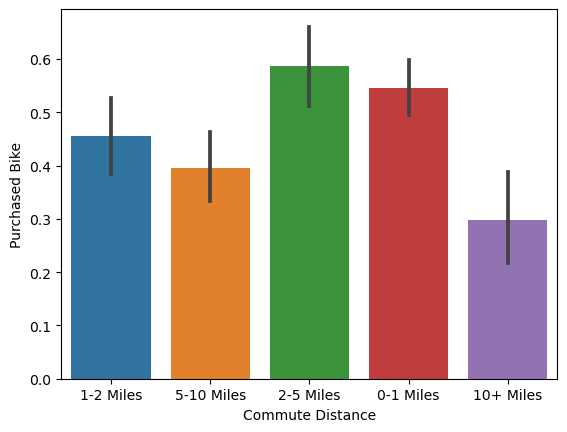

In [5]:
sns.barplot(df, x = 'Commute Distance', y = 'Purchased Bike')

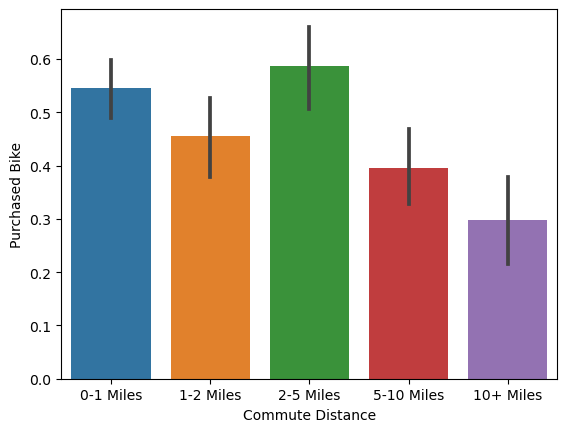

In [15]:
viz = sns.barplot(x = 'Commute Distance', y = 'Purchased Bike', data=df,
    order=['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles']);
viz.set_xticklabels(viz.get_xticklabels());

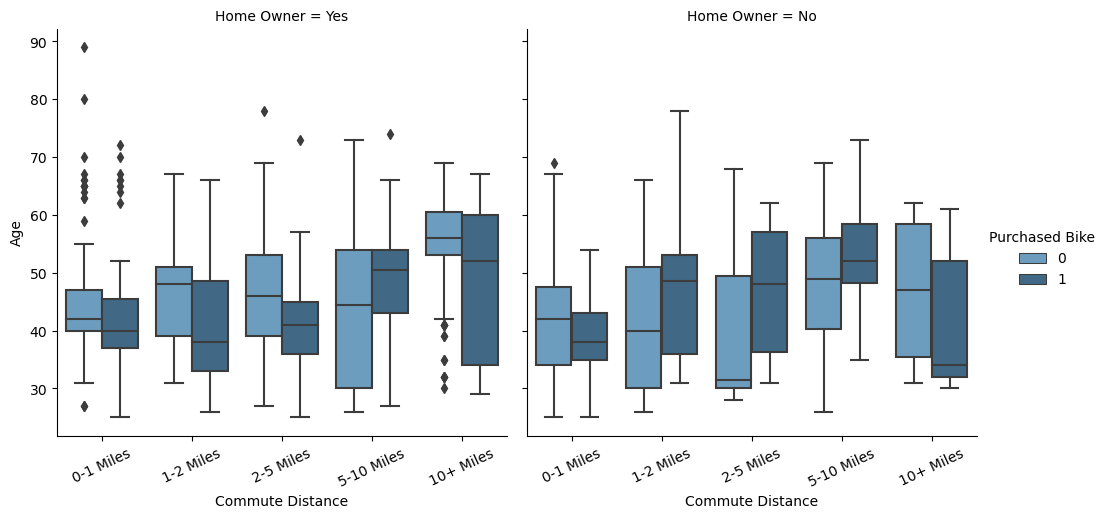

In [24]:
viz = sns.catplot(x="Commute Distance", y="Age", hue="Purchased Bike", col="Home Owner", data=df, 
            order=['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles'],
            errorbar="sd", palette="Blues_d", kind="box"); #box plot
viz.set_xticklabels(rotation=25);

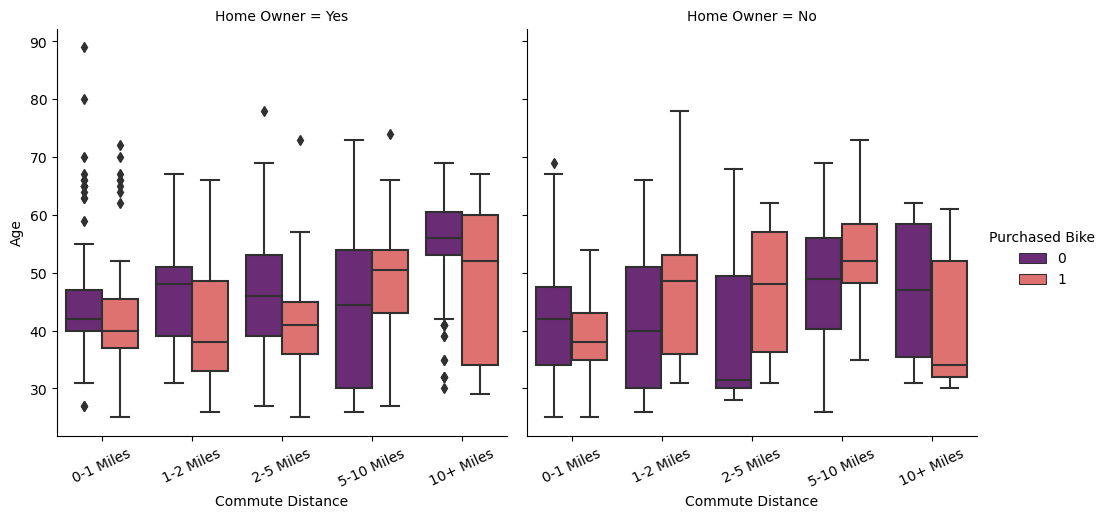

In [20]:
viz = sns.catplot(x="Commute Distance", y="Age", hue="Purchased Bike", col="Home Owner", data=df, 
            order=['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles'],
            errorbar="sd", palette="magma", kind="box"); #box plot
viz.set_xticklabels(rotation=25);